🔄 Fetching data for: ['TSLA', 'BND', 'SPY']


[*********************100%***********************]  3 of 3 completed
C:\Users\User\gmf-time-series-forecasting\src\data_utils.py:13: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  prices = prices.fillna(method='ffill').dropna()


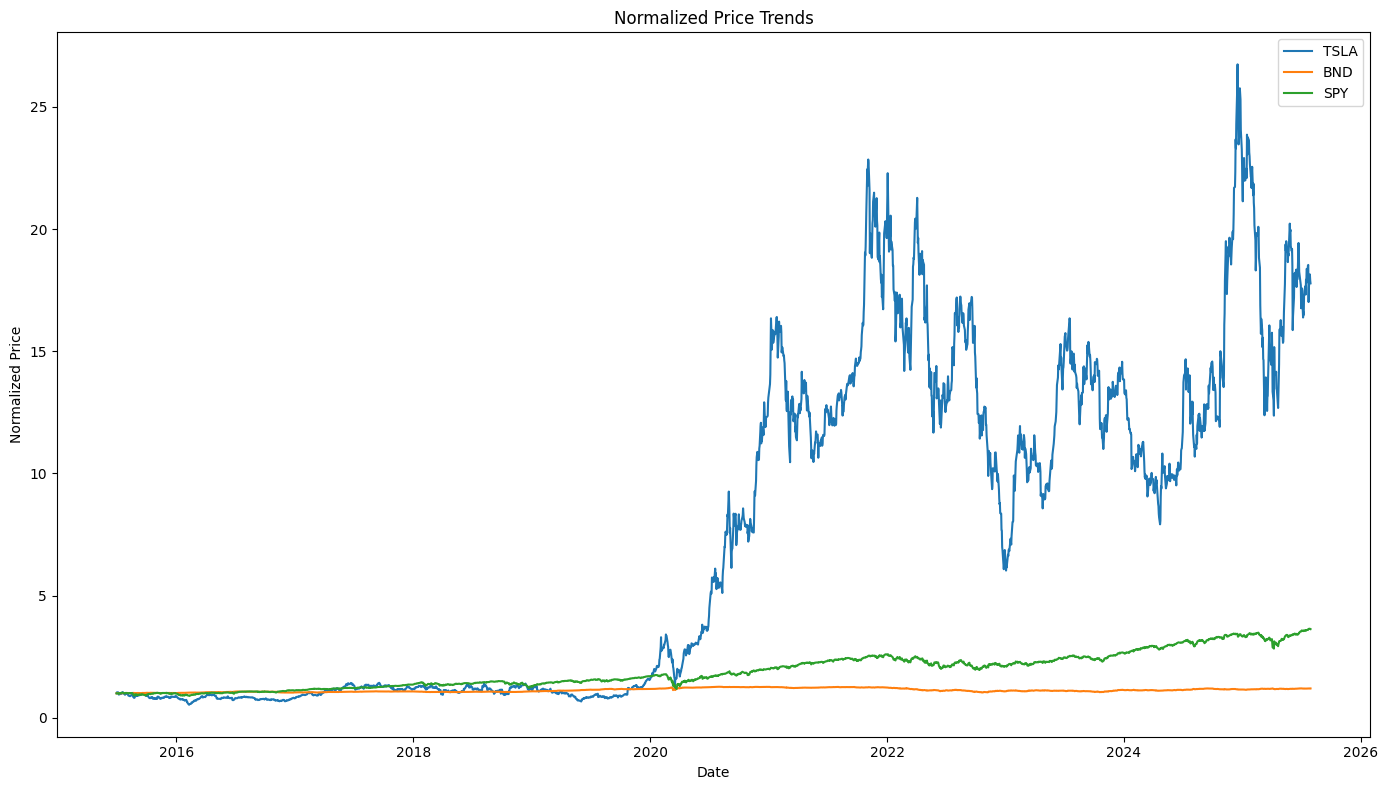

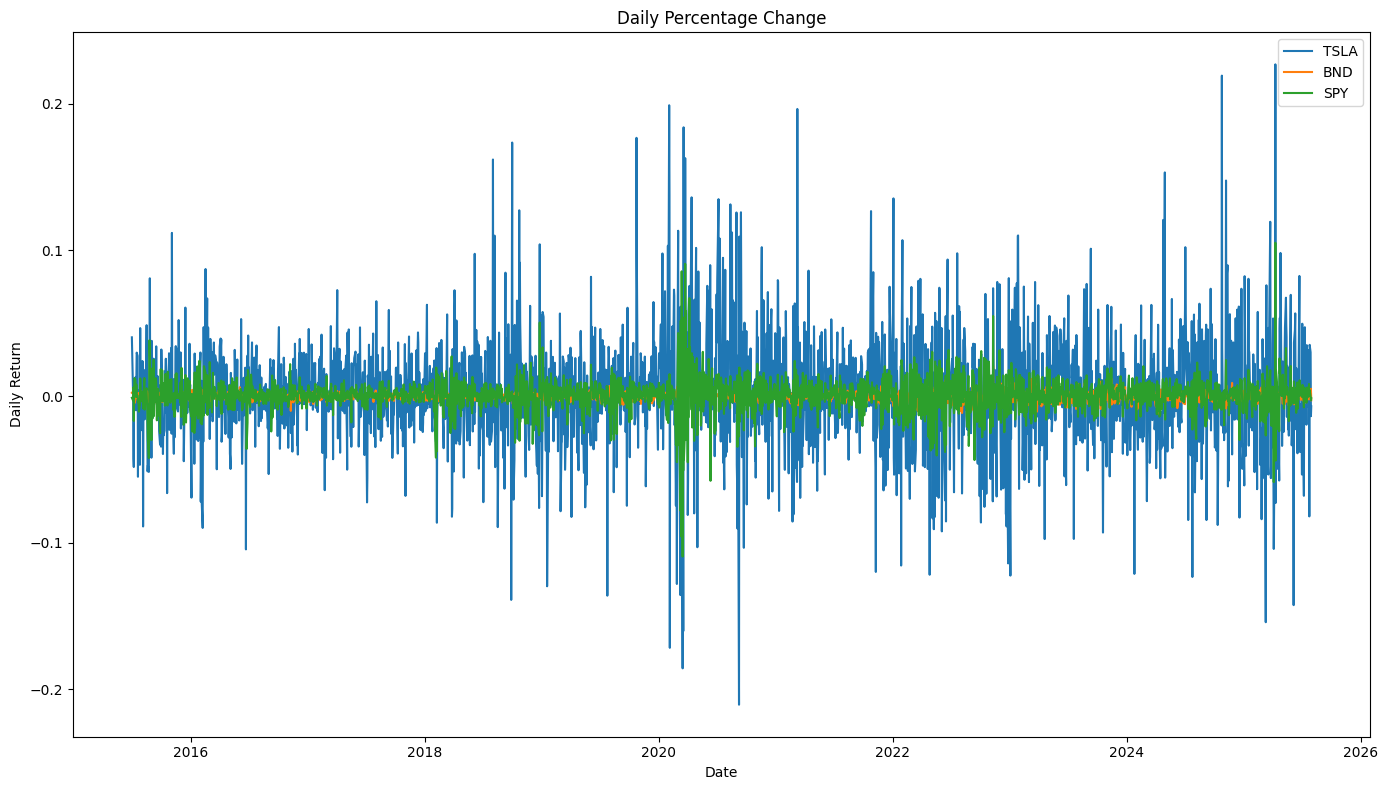

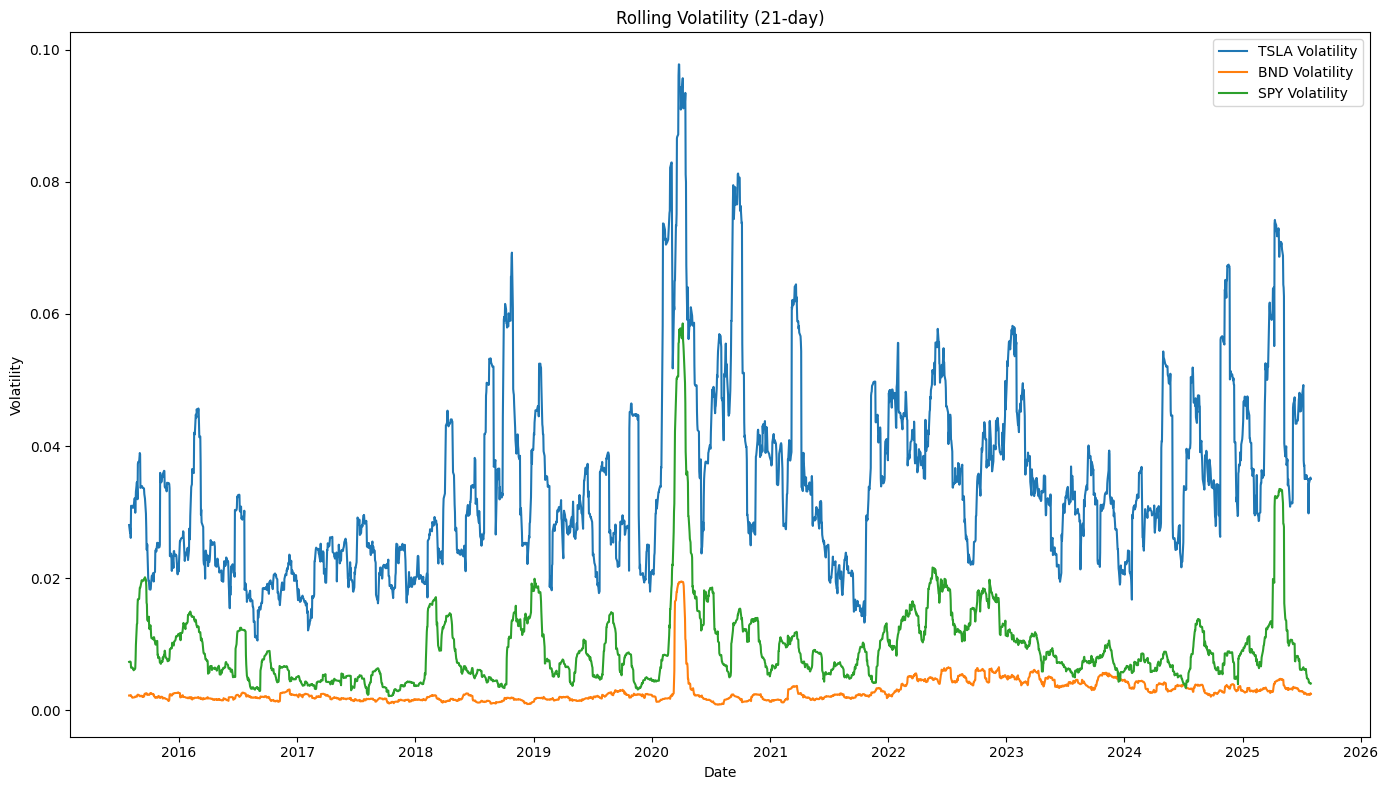

📌 Outliers:
TSLA - High: 179, Low: 156
BND - High: 0, Low: 1
SPY - High: 9, Low: 6

ADF Test for TSLA:
{'ADF Statistic': np.float64(-1.4188720053968273), 'p-value': np.float64(0.5731959514207222), 'Stationary': np.False_}

ADF Test for BND:
{'ADF Statistic': np.float64(-1.5362525848682227), 'p-value': np.float64(0.5155076072848624), 'Stationary': np.False_}

ADF Test for SPY:
{'ADF Statistic': np.float64(0.6908129444535777), 'p-value': np.float64(0.9896527316231066), 'Stationary': np.False_}

TSLA VaR (95%): -0.0547
TSLA Sharpe Ratio: 0.05

BND VaR (95%): -0.0049
BND Sharpe Ratio: 0.01

SPY VaR (95%): -0.0172
SPY Sharpe Ratio: 0.05


In [1]:
# Fix import paths
import sys
import os

project_root = os.path.abspath("..")  
sys.path.insert(0, project_root)

from src.config import assets, start_date, end_date
from src.data_utils import fetch_and_clean_data
from src.eda_utils import compute_daily_returns, compute_rolling_volatility, detect_outliers
from src.stats_utils import adf_test, calculate_var, calculate_sharpe_ratio
from src.plot_utils import plot_price_trends, plot_daily_returns, plot_volatility


prices = fetch_and_clean_data(assets, start_date, end_date)

returns = compute_daily_returns(prices)
rolling_mean, rolling_std = compute_rolling_volatility(returns)


plot_price_trends(prices, assets)
plot_daily_returns(returns, assets)
plot_volatility(rolling_std, assets)


outliers = detect_outliers(returns)
print("📌 Outliers:")
for asset in assets:
    print(f"{asset} - High: {len(outliers[asset]['high'])}, Low: {len(outliers[asset]['low'])}")


for asset in assets:
    result = adf_test(prices[asset])
    print(f"\nADF Test for {asset}:")
    print(result)


for asset in assets:
    var = calculate_var(returns[asset])
    sharpe = calculate_sharpe_ratio(returns[asset])
    print(f"\n{asset} VaR (95%): {var:.4f}")
    print(f"{asset} Sharpe Ratio: {sharpe:.2f}")

